***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 2**

***Problem 2.13***


***Plot the global irradiance G(α,β) reaching the plane of array (POA) of a south-facing, 30° tilted generator over grass (reflectivity=0.2) located at a PV plant in San Francisco, California (37.77°, -122.42°) during August 30, 2022, and compare with the irradiance collected using a single axis tracking whose axis is oriented North-South.
Solve the problem using pvlib-python and the default clear-sky model.***

***Solve the problem using pvlib-python and the default clear-sky model.***

We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/), [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.


In [6]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt

We start by defining the location, date and time. 
We will implement the calculation for every hour on May 12, 2022. 

In [11]:
# San Francisco, California
lat, lon = 37.77, -122.42
tz = 'Mexico/BajaSur'  #existing timezones can be checked using pytz.all_timezones[::20]

date = '2022-08-30'

# surface angles beta, alpha
tilt, orientation = 30, 180 # pvlib sets orientation origin at North -> South=180

# location
location = pvlib.location.Location(lat, lon, tz=tz)

# albedo
albedo = 0.20 #grass reflectivity

# datetimes
times = pd.date_range(start=date, freq='1H', periods=24, tz=tz)

We calculate the clear-sky irradiance using the default options in pvlib. 

In [12]:
# generates clear-sky ghi, dni, dhi irradiances (decomposition using Ineichen model and turbidity index; pvlib's default)
clearsky = location.get_clearsky(times, model='ineichen')

We calculate the Sun's coordinates and calculate the irradiance on the plane of array (POA) for the fixed and the tracking systems

In [13]:
# calculates Sun's coordinates
solar_position = location.get_solarposition(times=times)

# calculates POA (transposition using isotropic model)
poa_fixed_irradiance = pvlib.irradiance.get_total_irradiance(
                        surface_tilt=tilt,
                        surface_azimuth=orientation,
                        dni=clearsky['dni'],
                        ghi=clearsky['ghi'],
                        dhi=clearsky['dhi'],
                        albedo=albedo,
                        solar_zenith=solar_position['apparent_zenith'],
                        solar_azimuth=solar_position['azimuth'],
                        model='isotropic')

# 1axis tracker
mount = pvlib.pvsystem.SingleAxisTrackerMount(
    axis_tilt=0,
    axis_azimuth=180,
    max_angle=90,
    backtrack=False,  # for true-tracking
    gcr=0.5)

poa_1axis_irradiance = pvlib.pvsystem.Array(mount=mount).get_irradiance(
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    albedo=albedo,
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'],
    model='isotropic')


We can plot the daily evolution of direct, diffuse, and global irradiance

Text(0, 0.5, 'Radiation (W/m2)')

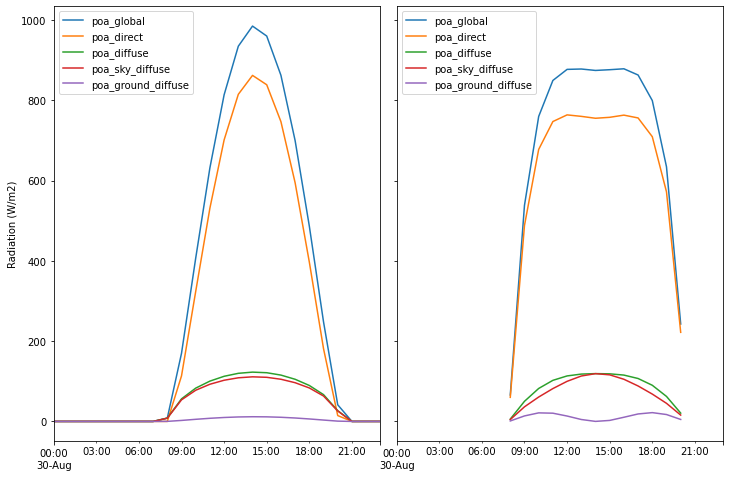

In [15]:
fig, (ax_poa_fixed, ax_poa_1axis) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True, squeeze=True)
plt.subplots_adjust(wspace=0.05)

poa_fixed_irradiance.plot(ax=ax_poa_fixed)
poa_1axis_irradiance.plot(ax=ax_poa_1axis)
ax_poa_fixed.set_ylabel('Radiation (W/m2)')